## Build a Customer Profile

Trix Chocolate company has experienced significant growth over the past two years, driven by the introduction of new chocolate flavors and the increasing digitalization of the food industry. This rapid expansion has highlighted a need to strengthen customer relationships to remain competitive and enhance loyalty. However, there is a disconnect between employees and customers, with many stakeholders lacking awareness of key customer characteristics. As the project owner, my objective is to deepen customer relationships through analytics. Your task as a data analyst is to extract insights from the choco_customer_kpi.csv dataset, build customer profiles, and share these insights internally with the operational and marketing teams. You will need to segment the data by demographics and use compelling visualizations to reveal customer characteristics.

In [108]:
#Import the data and check the contents
import pandas as pd
import matplotlib.pyplot as plt
#Import visualization libraries
import seaborn as sns

In [109]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [110]:
#Load the data using the read_csv function, storing it inside an object called df. You just need to include the file name with quotation marks. Putting .head()  after df gives us the first 5 rows of data.

df = pd.read_csv("../../data/BuildACustomerProfile/choco_customer_kpi.csv")
df.head()

,customer_id,firstorder,gender,age,orders,discount_rate,revenue,hazelnut,milk,white,strawberry_yoghurt,caramel,dark,m_and_m,cookie,almond,macadamia,lemon,average_item_value,profit
0,9640000000000.000000,202205.000000,Female,37.000000,1,0.250000,7.500000,0.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.800000,0.800000
1,8750000000000.000000,202205.000000,Female,54.000000,1,0.250000,9.800000,0.000000,0.000000,0.000000,0.000000,0.000000,9.800000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000,1.200000
2,332000000000.000000,202210.000000,Male,NaN,1,0.250000,10.300000,0.000000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.200000,0.800000
3,6090000000000.000000,202210.000000,Female,NaN,1,0.250000,9.500000,0.000000,9.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.800000,0.900000
4,9420000000000.000000,202208.000000,Female,NaN,3,0.340000,21.300000,21.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.600000,3.100000


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130834 entries, 0 to 130833
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         130834 non-null  float64
 1   firstorder          129820 non-null  float64
 2   gender              130834 non-null  object 
 3   age                 2856 non-null    float64
 4   orders              130834 non-null  int64  
 5   discount_rate       130834 non-null  float64
 6   revenue             130834 non-null  float64
 7   hazelnut            130834 non-null  float64
 8   milk                130834 non-null  float64
 9   white               130834 non-null  float64
 10  strawberry_yoghurt  130834 non-null  float64
 11  caramel             130834 non-null  float64
 12  dark                130834 non-null  float64
 13  m_and_m             130834 non-null  float64
 14  cookie              130834 non-null  float64
 15  almond              130834 non-nul

In [112]:
df.describe()

,customer_id,firstorder,age,orders,discount_rate,revenue,hazelnut,milk,white,strawberry_yoghurt,caramel,dark,m_and_m,cookie,almond,macadamia,lemon,average_item_value,profit
count,130834.000000,129820.000000,2856.000000,130834.000000,130834.000000,130834.000000,130834.000000,130834.000000,130834.000000,130834.000000,130834.000000,130834.000000,130834.000000,130834.000000,130834.000000,130834.000000,130834.000000,130834.000000,130834.000000
mean,5010828581577.384766,202207.152804,37.001050,1.597085,0.259857,10.623840,1.443139,1.770077,0.628307,0.349493,1.167121,1.626313,0.632309,0.202434,1.312923,0.635725,0.856112,2.193675,0.313082
std,2886046714876.227539,1.578853,37.225187,1.763334,0.176401,19.960309,7.158154,8.988186,4.072114,3.098332,6.772586,8.998317,4.654116,2.539265,6.892171,4.384347,5.174450,1.563138,2.348158
min,47789637.000000,202203.000000,14.000000,1.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-86.400000
25%,2510000000000.000000,202206.000000,28.000000,1.000000,0.120000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,-0.400000
50%,5010000000000.000000,202207.000000,35.000000,1.000000,0.260000,6.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000,0.100000
75%,7510000000000.000000,202209.000000,43.000000,2.000000,0.400000,11.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000,0.700000
max,10000000000000.000000,202210.000000,1949.000000,105.000000,1.000000,1530.300000,799.100000,1308.600000,264.300000,436.000000,727.500000,1396.000000,549.600000,351.800000,688.400000,357.200000,616.500000,40.200000,184.300000


1. High Variability: There is high variability in quantities, unit prices, and revenue, indicating a wide range of transaction sizes.

2. Outliers: Significant outliers in metrics like age, quantity, unit price, and revenue suggest a need for further investigation.

3. Customer Orders: Most customers make a few orders, but there are outliers with significantly more.

4. Product Preferences: Some products (e.g., Milk, Dark) have higher mean values, indicating more popular choices. However, the standard deviations suggest wide variability in preferences.

5. Profit and Average Item Value: These metrics have smaller mean values but high variability, suggesting some transactions are significantly more profitable than others.


## Descriptive Statistics


#### Measures of Central Tendency:

In [113]:
#Mean: The average value of the dataset.
df.describe().loc['mean']

customer_id          5010828581577.384766
firstorder                  202207.152804
age                             37.001050
orders                           1.597085
discount_rate                    0.259857
revenue                         10.623840
hazelnut                         1.443139
milk                             1.770077
white                            0.628307
strawberry_yoghurt               0.349493
caramel                          1.167121
dark                             1.626313
m_and_m                          0.632309
cookie                           0.202434
almond                           1.312923
macadamia                        0.635725
lemon                            0.856112
average_item_value               2.193675
profit                           0.313082
Name: mean, dtype: float64

In [114]:
#Median: The middle value when the dataset is sorted in ascending order.
df.describe().loc['50%']

customer_id          5010000000000.000000
firstorder                  202207.000000
age                             35.000000
orders                           1.000000
discount_rate                    0.260000
revenue                          6.100000
hazelnut                         0.000000
milk                             0.000000
white                            0.000000
strawberry_yoghurt               0.000000
caramel                          0.000000
dark                             0.000000
m_and_m                          0.000000
cookie                           0.000000
almond                           0.000000
macadamia                        0.000000
lemon                            0.000000
average_item_value               1.700000
profit                           0.100000
Name: 50%, dtype: float64

Median Spend Per Item: If you were to look at all the transactions where items were bought, the middle value of the amount spent per item is $1.70. In other words, half of the items were purchased for less than $1.70 each, and the other half were purchased for more than $1.70 each.
This metric helps in understanding the typical expenditure per item purchased, providing insight into the average value customers are willing to spend on individual items.

In [115]:
#Mode: The most frequently occurring value(s) in the dataset.
df.describe().mode()

,customer_id,firstorder,age,orders,discount_rate,revenue,hazelnut,milk,white,strawberry_yoghurt,caramel,dark,m_and_m,cookie,almond,macadamia,lemon,average_item_value,profit
0,130834.000000,1.578853,14.000000,1.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-86.400000
1,47789637.000000,129820.000000,28.000000,NaN,0.120000,3.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.200000,-0.400000
2,2510000000000.000000,202203.000000,35.000000,NaN,0.176401,6.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.563138,0.100000
3,2886046714876.227539,202206.000000,37.001050,NaN,0.259857,10.623840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000,0.313082
4,5010000000000.000000,202207.000000,37.225187,NaN,0.260000,11.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.193675,0.700000
5,5010828581577.384766,202207.152804,43.000000,NaN,0.400000,19.960309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.348158
6,7510000000000.000000,202209.000000,1949.000000,NaN,1.000000,1530.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.200000,184.300000
7,10000000000000.000000,202210.000000,2856.000000,NaN,130834.000000,130834.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130834.000000,130834.000000


#### Measures of Dispersion:

In [116]:
# Range: The difference between the maximum and minimum values.
df.describe().loc['max']

customer_id          10000000000000.000000
firstorder                   202210.000000
age                            1949.000000
orders                          105.000000
discount_rate                     1.000000
revenue                        1530.300000
hazelnut                        799.100000
milk                           1308.600000
white                           264.300000
strawberry_yoghurt              436.000000
caramel                         727.500000
dark                           1396.000000
m_and_m                         549.600000
cookie                          351.800000
almond                          688.400000
macadamia                       357.200000
lemon                           616.500000
average_item_value               40.200000
profit                          184.300000
Name: max, dtype: float64

In [117]:
# Variance: The average of the squared differences from the mean, indicating how spread out the data is.
# Standard Deviation: The square root of the variance, showing the average distance of each data point from the mean.

df.describe().loc['std']

customer_id          2886046714876.227539
firstorder                       1.578853
age                             37.225187
orders                           1.763334
discount_rate                    0.176401
revenue                         19.960309
hazelnut                         7.158154
milk                             8.988186
white                            4.072114
strawberry_yoghurt               3.098332
caramel                          6.772586
dark                             8.998317
m_and_m                          4.654116
cookie                           2.539265
almond                           6.892171
macadamia                        4.384347
lemon                            5.174450
average_item_value               1.563138
profit                           2.348158
Name: std, dtype: float64

#### What does IQR Indicate ?

1. Spread of Data: The IQR tells you about the spread of the central 50% of your data. A larger IQR indicates greater variability in the middle 50% of the data.

2. Outlier Detection: Values outside the IQR (typically Q1 - 1.5IQR and Q3 + 1.5IQR) are considered potential outliers. This is useful for identifying extreme values in your dataset.

3. Consistency: Smaller IQR values suggest that the data is more consistent and less variable. Larger IQR values indicate more spread and variability in the data.

In [118]:
df = df.apply(pd.to_numeric, errors='coerce')
quartile1 = df.quantile(q=0.25)
quartile3 = df.quantile(q=0.75)
IQR = quartile3 - quartile1
# Print quartiles and IQR next to each other
result = pd.DataFrame({
    'Q1': quartile1,
    'Q3': quartile3,
    'IQR': IQR
})

print(result)

                                     Q1                   Q3  \
customer_id        2510000000000.000000 7510000000000.000000   
firstorder                202206.000000        202209.000000   
gender                              NaN                  NaN   
age                           28.000000            43.000000   
orders                         1.000000             2.000000   
discount_rate                  0.120000             0.400000   
revenue                        3.500000            11.100000   
hazelnut                       0.000000             0.000000   
milk                           0.000000             0.000000   
white                          0.000000             0.000000   
strawberry_yoghurt             0.000000             0.000000   
caramel                        0.000000             0.000000   
dark                           0.000000             0.000000   
m_and_m                        0.000000             0.000000   
cookie                         0.000000 

#### What is High variability in a dataset 

High Variability is generally indicated by large measures of dispersion, which suggest that the data points are spread out over a wide range of values. Here are some common indicators of high variability:

High Standard Deviation: When the standard deviation is large relative to the mean, it indicates that the data points are widely spread out from the mean.

High Variance: Variance is the square of the standard deviation, so a high variance also indicates that the data points are spread out over a wide range.

Large Range: A large difference between the maximum and minimum values of the dataset indicates high variability.

High Interquartile Range (IQR): The IQR measures the spread of the middle 50% of the data. A large IQR indicates that the central portion of the data is spread out.

Contextual Factors for High Variability:
Relative to the Mean: Variability should be considered high if the standard deviation or variance is large compared to the mean. For example, if the mean is 10 and the standard deviation is 15, it indicates high variability.

Nature of the Data: High variability might be expected in certain types of data. For instance, financial data such as stock prices often exhibit high variability, whereas human heights typically have lower variability.

Comparison to Benchmarks: High variability can also be determined by comparing it to industry standards or historical data. If a company's sales data shows much higher variability than industry benchmarks, it indicates high variability.



In [119]:
#### Standard deviation

result = pd.DataFrame({
    'Mean': df.describe().loc['mean'],
    'Std': df.describe().loc['std'],
    'Range': df.describe().loc['std'] - df.describe().loc['mean'],
    'IQR': IQR
})

print(result)

                                   Mean                  Std  \
customer_id        5010828581577.384766 2886046714876.227539   
firstorder                202207.152804             1.578853   
gender                              NaN                  NaN   
age                           37.001050            37.225187   
orders                         1.597085             1.763334   
discount_rate                  0.259857             0.176401   
revenue                       10.623840            19.960309   
hazelnut                       1.443139             7.158154   
milk                           1.770077             8.988186   
white                          0.628307             4.072114   
strawberry_yoghurt             0.349493             3.098332   
caramel                        1.167121             6.772586   
dark                           1.626313             8.998317   
m_and_m                        0.632309             4.654116   
cookie                         0.202434 


##### Observations

1. **Customer ID**:
   - **Mean**: \( 5.01 \times 10^{12} \)
   - **Std**: \( 2.89 \times 10^{12} \)
   - **Range**: Negative value indicates issues, possibly due to incorrect data types or errors.
   - **IQR**: Very large, indicating a wide spread of IDs.

2. **First Order**:
   - **Mean**: 202207.15
   - **Std**: 1.58
   - **Range**: Large negative value indicates issues, which could be due to incorrect data formatting.
   - **IQR**: 3.00, indicating low variability.

3. **Gender**:
   - **Mean** and **Std**: Not available (NaN), likely because it's a categorical variable.

4. **Age**:
   - **Mean**: 37.00
   - **Std**: 37.23, indicating high variability.
   - **Range**: Small range (0.22), suggesting minimal spread.
   - **IQR**: 15.00, indicating moderate variability in the middle 50% of the data.

5. **Orders**:
   - **Mean**: 1.60
   - **Std**: 1.76, indicating significant variability.
   - **Range**: 0.17, suggesting minimal spread.
   - **IQR**: 1.00, indicating variability in the middle 50% of the data.

6. **Discount Rate**:
   - **Mean**: 0.26
   - **Std**: 0.18
   - **Range**: -0.08, suggesting minimal spread.
   - **IQR**: 0.28, indicating variability in discount rates.

7. **Revenue**:
   - **Mean**: 10.62
   - **Std**: 19.96, indicating high variability.
   - **Range**: 9.34
   - **IQR**: 7.60, showing variability in revenue.

8. **Hazelnut**:
   - **Mean**: 1.44
   - **Std**: 7.16
   - **Range**: 5.72
   - **IQR**: 0.00, indicating that most values are concentrated.

9. **Milk**:
   - **Mean**: 1.77
   - **Std**: 8.99
   - **Range**: 7.22
   - **IQR**: 0.00, suggesting low variability.

10. **White**:
    - **Mean**: 0.63
    - **Std**: 4.07
    - **Range**: 3.44
    - **IQR**: 0.00, indicating minimal variability.

11. **Strawberry Yoghurt**:
    - **Mean**: 0.35
    - **Std**: 3.10
    - **Range**: 2.75
    - **IQR**: 0.00, suggesting concentration of values.

12. **Caramel**:
    - **Mean**: 1.17
    - **Std**: 6.77
    - **Range**: 5.61
    - **IQR**: 0.00, indicating concentration.

13. **Dark**:
    - **Mean**: 1.63
    - **Std**: 9.00
    - **Range**: 7.37
    - **IQR**: 0.00, suggesting low variability.

14. **M&M**:
    - **Mean**: 0.63
    - **Std**: 4.65
    - **Range**: 4.02
    - **IQR**: 0.00, indicating concentration.

15. **Cookie**:
    - **Mean**: 0.20
    - **Std**: 2.54
    - **Range**: 2.34
    - **IQR**: 0.00, suggesting concentration.

16. **Almond**:
    - **Mean**: 1.31
    - **Std**: 6.89
    - **Range**: 5.58
    - **IQR**: 0.00, indicating concentration.

17. **Macadamia**:
    - **Mean**: 0.64
    - **Std**: 4.38
    - **Range**: 3.75
    - **IQR**: 0.00, suggesting low variability.

18. **Lemon**:
    - **Mean**: 0.86
    - **Std**: 5.17
    - **Range**: 4.32
    - **IQR**: 0.00, indicating concentration.

19. **Average Item Value**:
    - **Mean**: 2.19
    - **Std**: 1.56
    - **Range**: -0.63
    - **IQR**: 1.50, showing variability in item values.

20. **Profit**:
    - **Mean**: 0.31
    - **Std**: 2.35
    - **Range**: 2.04
    - **IQR**: 1.10, indicating variability in profit.



##### Summary
1. High Variability: Revenue, Hazelnut, Milk, Dark, and Caramel show high standard deviations and wide ranges.

2. Low Variability: Columns like Gender, Hazelnut, Milk, and Dark have IQRs of 0.00, suggesting that most values are concentrated around the mean.

3. Issues with Data: Some columns like Customer ID and First Order show negative ranges and unusual values, suggesting possible data issues or incorrect data types.

#### Shape of the Distribution

In [120]:
# Skewness: A measure of the asymmetry of the data distribution.
df.skew()

customer_id          -0.003539
firstorder            0.446679
gender                     NaN
age                  47.504884
orders               11.971994
discount_rate         0.023335
revenue              17.439273
hazelnut             30.489336
milk                 41.527550
white                22.746335
strawberry_yoghurt   40.869240
caramel              35.015871
dark                 49.234497
m_and_m              36.589809
cookie               53.696884
almond               30.564296
macadamia            27.274630
lemon                29.928508
average_item_value    2.825673
profit               15.230067
dtype: float64

Age: Likely right-skewed, given the maximum value of 1949 and a mean greater than the median.

Orders: Right-skewed, as the maximum number of orders (105) is much higher than the mean and median.

Discount Rate: Likely right-skewed, with a maximum of 1.0.

Revenue: Right-skewed, as the maximum revenue (1530.3) is much higher than the mean and median.


In [121]:
# Kurtosis: A measure of the "tailedness" of the data distribution.
df.kurtosis()

customer_id            -1.198752
firstorder             -1.019791
gender                       NaN
age                  2439.937394
orders                330.027478
discount_rate          -0.912397
revenue               695.454230
hazelnut             2095.625951
milk                 4130.505930
white                 888.648937
strawberry_yoghurt   3753.558427
caramel              2477.264517
dark                 5398.682308
m_and_m              2655.061210
cookie               4863.051259
almond               2030.754486
macadamia            1362.549460
lemon                2107.011300
average_item_value     20.616820
profit                868.980180
dtype: float64

Kurtosis:

Age: Likely high kurtosis due to extreme outliers.

Orders: Likely high kurtosis, indicating more extreme values than a normal distribution.

Discount Rate: Expected to have low kurtosis due to limited range.

Revenue: High kurtosis due to extreme outliers.

## Prescriptive Insights

Prescriptive Insights:
Address Missing Age Data: Given the large number of missing age values, consider methods for imputing these values or adjusting analyses to focus on the available data.

Target Frequent Customers: The majority of customers place one or two orders, indicating a potential area for marketing efforts to convert these into repeat customers.

Outlier Management: Extreme values in age, orders, and revenue suggest the need for outlier management strategies, such as capping or transforming outliers for more robust analysis.

Promotional Strategy: The discount rate varies significantly. Analyzing the effectiveness of different discount rates on revenue and profit could help optimize promotional strategies.

Product Preferences: With various chocolate types, understanding the distribution and preference for each type can guide inventory and marketing decisions. The high standard deviation in product-specific revenue indicates diverse customer preferences.

Demographic Segmentation: Segmenting customers based on demographics like age and geographic location can help tailor marketing campaigns and product offerings.

## Data Visualization - Generate the First Customer Description 


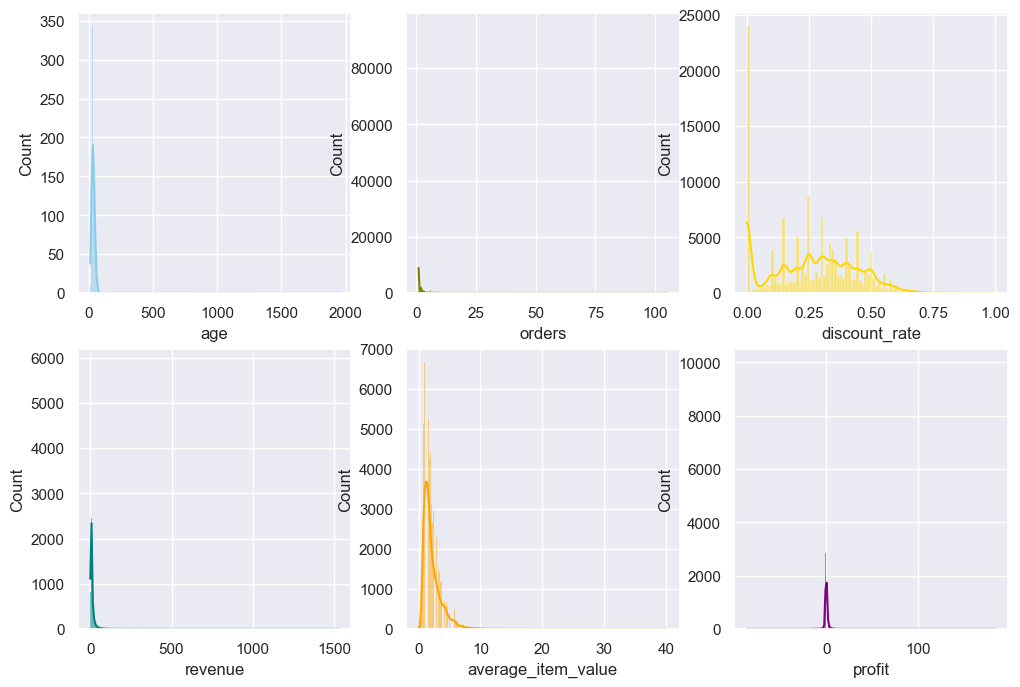

In [122]:
    # set a grey background 
    sns.set(style="darkgrid")
     
    #Create 6 different subplots (2 by 3) to plot each variables
    fig, axs = plt.subplots(2, 
                            3, 
                            figsize=(12, 8))
     
    #Create a histogram for each variable. There are 6 arguments. 
    #Data is the data source, x is the variable name, color is the specified color for each variable
    #kde is for the density curve, ax is to allocate the graph in each subplot.
    sns.histplot(data=df, 
                 x = 'age', 
                 color="skyblue", 
                 label="Age", 
                 kde=True, 
                 ax=axs[0, 0])
    sns.histplot(data=df, 
                 x = 'orders', 
                 color="olive", 
                 label="# Orders",
                 kde=True, 
                 ax=axs[0, 1])
    sns.histplot(data=df,
                 x = 'discount_rate', 
                 color="gold", 
                 label="Discount rate", 
                 kde=True, 
                 ax=axs[0, 2])
    sns.histplot(data=df, 
                 x = 'revenue', 
                 color="teal", 
                 label="Revenue", 
                 kde=True, 
                 ax=axs[1, 0])
    sns.histplot(data=df, 
                 x = 'average_item_value', 
                 color="orange", 
                 label="Average Item Value", 
                 kde=True,
                 ax=axs[1, 1])
    sns.histplot(data=df, 
                 x = 'profit', 
                 color="purple", 
                 label="Revenue",
                 kde=True, 
                 ax=axs[1, 2])
     
    plt.show()

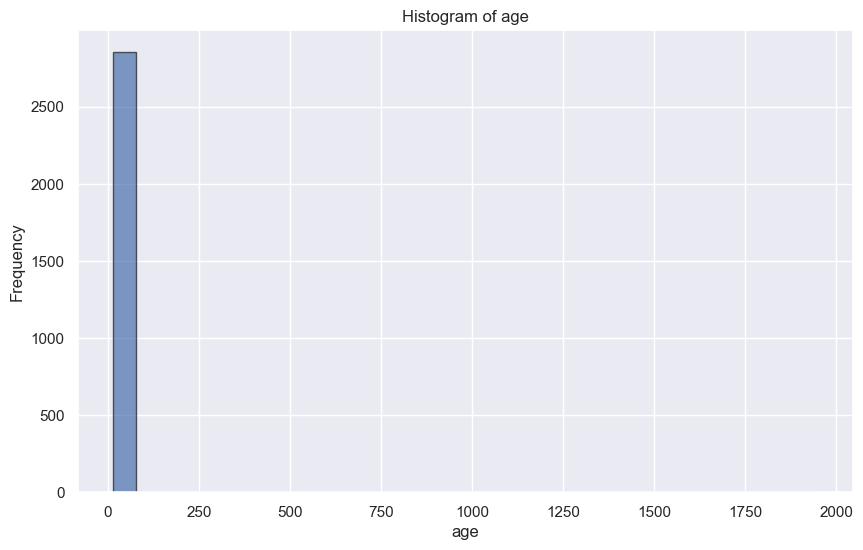

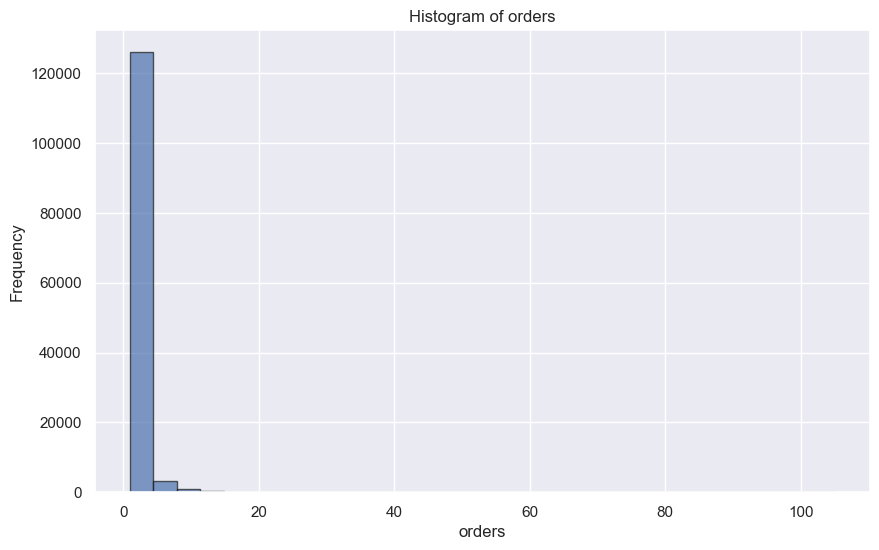

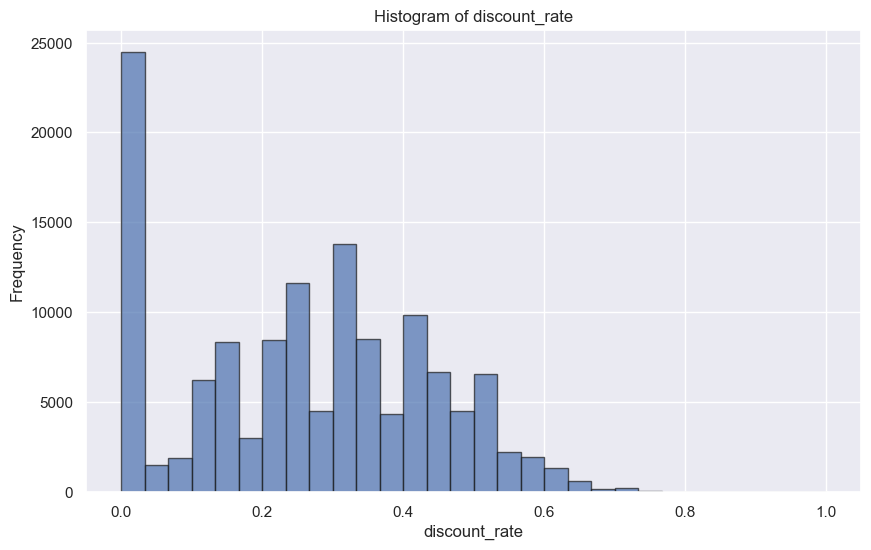

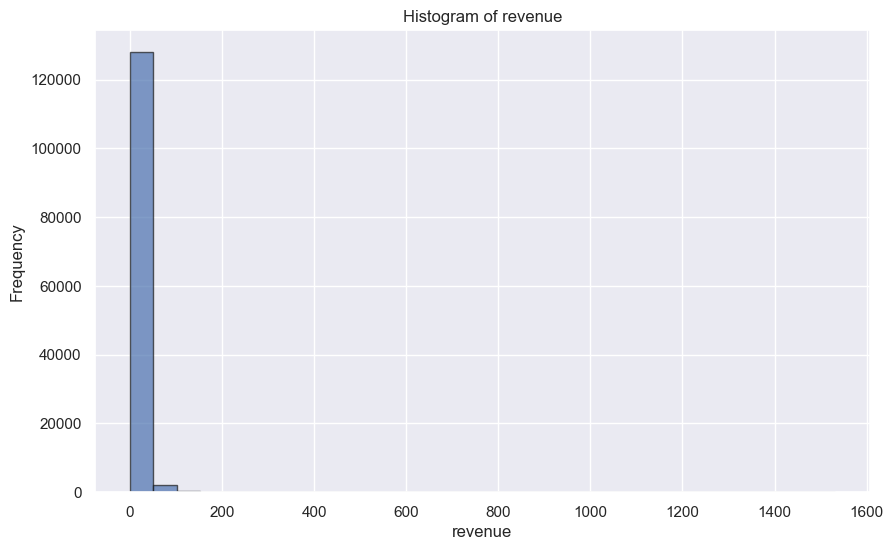

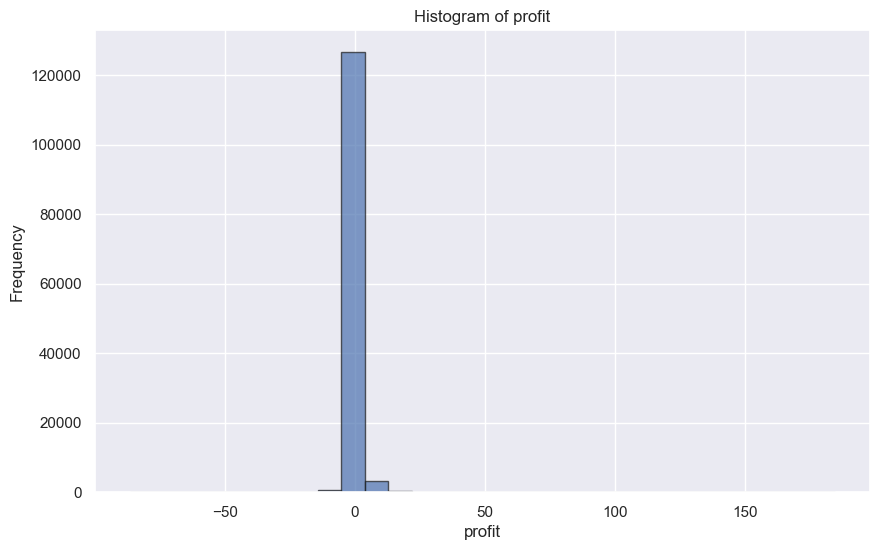

In [123]:
#Histograms: Graphs that show the frequency distribution of a single variable.
# Plot histograms for selected columns
columns_to_plot = ['age', 'orders', 'discount_rate', 'revenue', 'profit']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

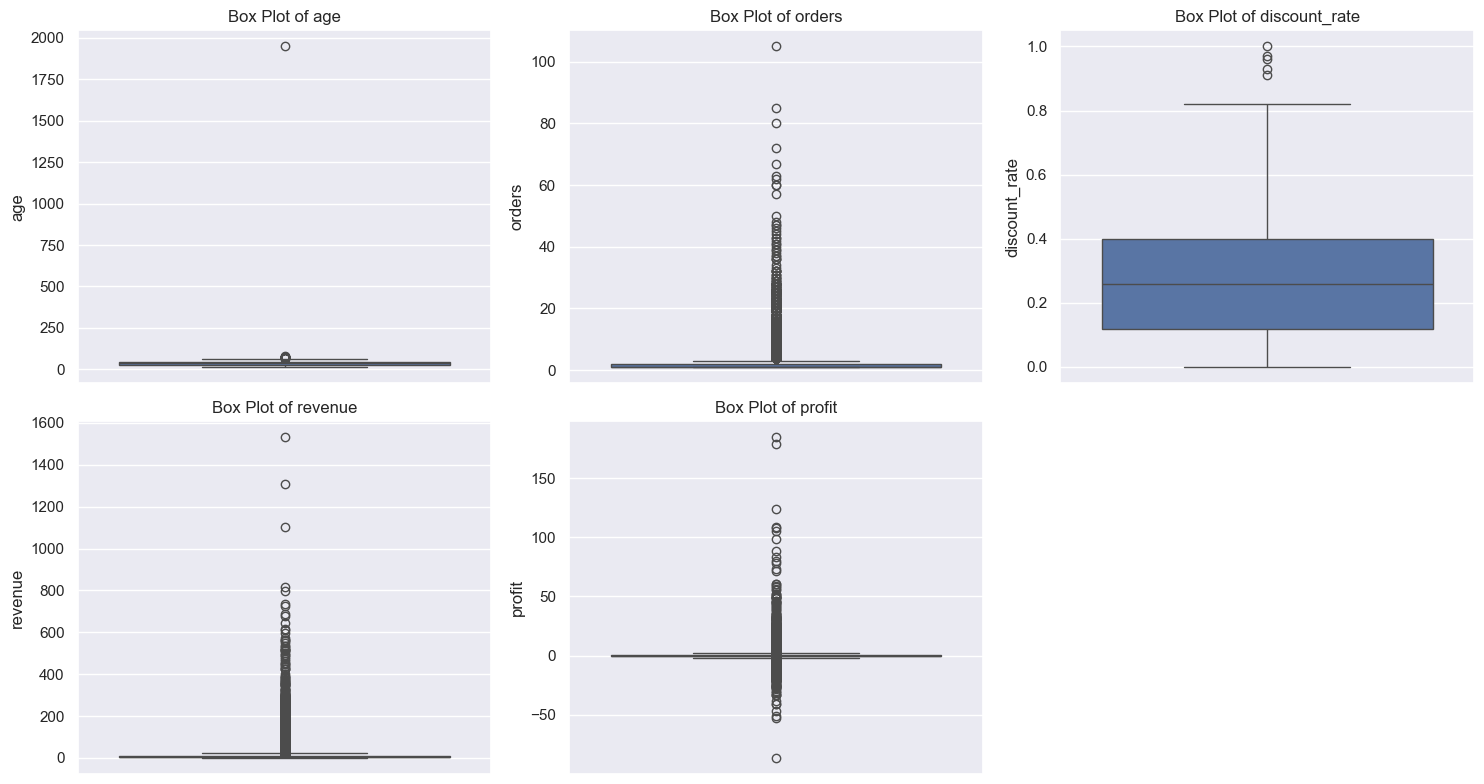

In [124]:
# Box Plots: Graphs that show the distribution of a dataset based on five summary statistics: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.
import seaborn as sns

# Plot box plots for selected columns
plt.figure(figsize=(15, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

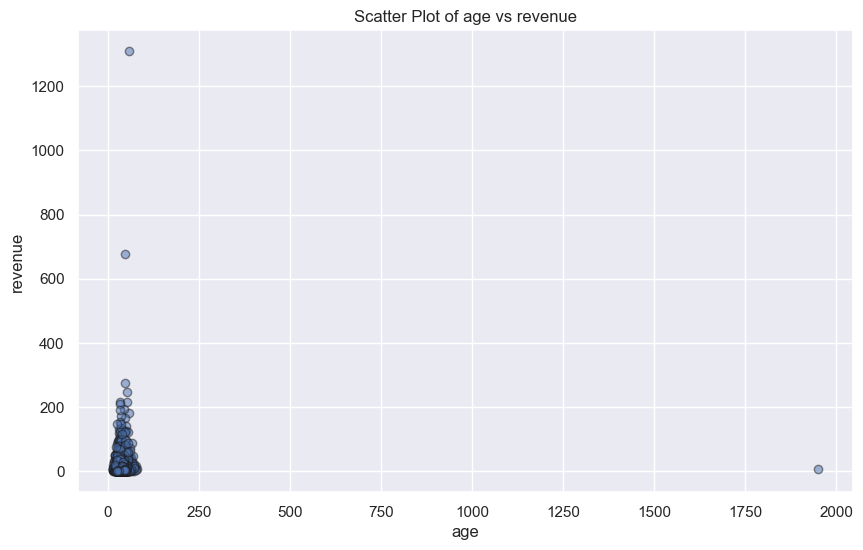

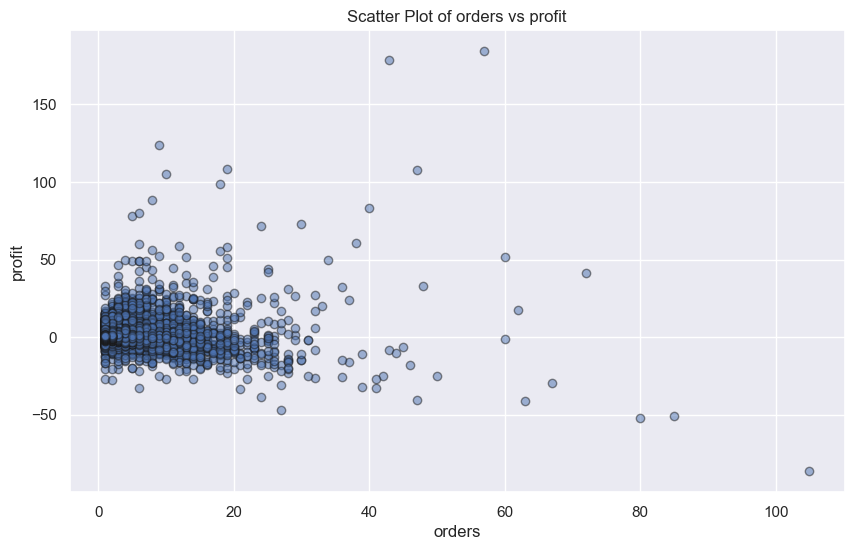

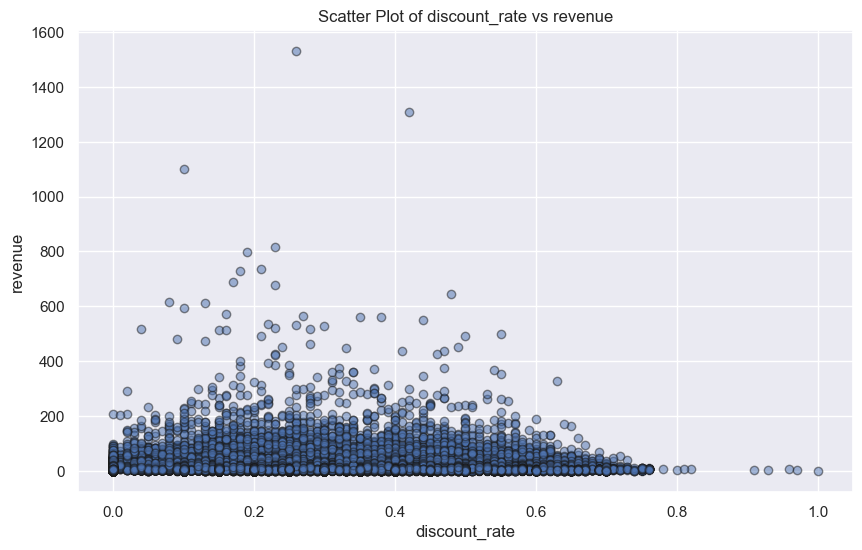

In [125]:
# Scatter Plots: Graphs that show the relationship between two continuous variables.
# Plot scatter plots for selected pairs of columns
pairs_to_plot = [('age', 'revenue'), ('orders', 'profit'), ('discount_rate', 'revenue')]

for (x, y) in pairs_to_plot:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x], df[y], alpha=0.5, edgecolor='k')
    plt.title(f'Scatter Plot of {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

In [126]:
#Determine which categories make sense to find outliers for. One possible solution is set to three conditions to remove the outliers, including age, orders, and revenue, as seen below.

#Remove outliers
df = df[df.age < 90]
df = df[df.orders < 20]
df = df[df.revenue < 500]

In [127]:
#Check the descriptive statistics and make a first description of the customer. For the description, use the median instead of the mean because the data is skewed positively.

#Cleaned descriptive statistics
df.describe()

,customer_id,firstorder,gender,age,orders,discount_rate,revenue,hazelnut,milk,white,strawberry_yoghurt,caramel,dark,m_and_m,cookie,almond,macadamia,lemon,average_item_value,profit
count,2847.000000,2817.000000,0.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000
mean,5182510007556.436523,202206.714945,NaN,36.305585,1.823323,0.265908,14.763716,2.131472,2.849245,0.671409,0.501791,1.253214,2.787320,0.648613,0.251739,1.541482,1.201405,0.925992,2.776993,0.481841
std,2859111973689.721191,1.580926,NaN,10.229553,1.743790,0.162927,19.441018,7.836106,9.555866,3.854372,3.526073,5.661393,8.434365,4.331254,2.241878,6.566314,6.472496,5.451396,1.846177,2.327147
min,1413132929.000000,202203.000000,NaN,14.000000,1.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,-20.500000
25%,2790000000000.000000,202205.000000,NaN,28.000000,1.000000,0.150000,5.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,-0.500000
50%,5300000000000.000000,202206.000000,NaN,35.000000,1.000000,0.250000,8.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.300000,0.400000
75%,7655000000000.000000,202208.000000,NaN,43.000000,2.000000,0.390000,15.900000,0.000000,1.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,4.100000,1.100000
max,10000000000000.000000,202210.000000,NaN,80.000000,19.000000,0.750000,275.200000,140.800000,157.900000,126.100000,104.400000,124.100000,131.800000,123.200000,76.700000,126.400000,192.100000,193.400000,29.800000,27.100000


An example description for the customer is as follows: The median customer is 35 years old and has done 1 order in the past year resulting in 8.3 median revenue per customer and 0.4 in profit. The average discount rate each customer applied is 25% and per item, customers spend a median of 2.3. 

## Visualize customer chocolate purchases

Build 2 different graphs to represent the chocolate preferences. The first should be a pie chart to show the share of each chocolate type.  The second should be a bar chart to rank the chocolate varieties' revenue. Customize the graphs. Assess the pros and cons of each.

Retrieve the names of all chocolate types, which are in the dataframe from columns 7 to 17.

In [128]:
#Retrieve variable names and values. You need to sum each variable
#Start by creating an object - categories - which will have the column names of all chocolate types which are from columns 7 to 17
#One way is to to use the iloc function to subset the columns and then retrieve the names using .columns
categories = df.iloc[:,7:18].columns
print(categories)

Index(['hazelnut', 'milk', 'white', 'strawberry_yoghurt', 'caramel', 'dark',
       'm_and_m', 'cookie', 'almond', 'macadamia', 'lemon'],
      dtype='object')


In [129]:
#Calculate the total revenues per chocolate type.

#Create an empty list to sum the revenues of each chocolate type
revenues = []
    
#the chocolate types go from columns 7 to 17.
for i in range(7,18):
    #for each column sum its values to get the total revenues for each chocolate type
    revenue_sum = df.iloc[:,i].sum()
    #Append the total revenues from above to the list created initially
    revenues.append(revenue_sum)
print(revenues)

[np.float64(6068.299999999999), np.float64(8111.8), np.float64(1911.5), np.float64(1428.6), np.float64(3567.8999999999996), np.float64(7935.5), np.float64(1846.6), np.float64(716.7), np.float64(4388.599999999999), np.float64(3420.4), np.float64(2636.3)]


In [130]:
#Aggregate everything by creating a new dataframe.

#creating a dataframe with the revenues per category
#Sorting the values in descending fashion will help with the visualization
df_categories = pd.DataFrame({'categories': categories,
                            'revenues': revenues}).sort_values(by = "revenues", 
                                                                ascending = False)
df_categories

,categories,revenues
1,milk,8111.800000
5,dark,7935.500000
0,hazelnut,6068.300000
8,almond,4388.600000
4,caramel,3567.900000
9,macadamia,3420.400000
10,lemon,2636.300000
2,white,1911.500000
6,m_and_m,1846.600000
3,strawberry_yoghurt,1428.600000


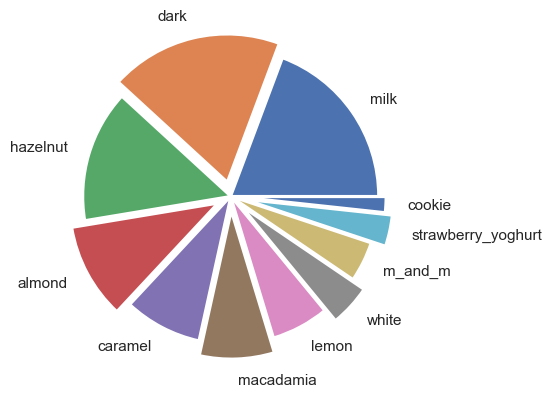

In [131]:
#Build a pie chart using the pie function from matplotlib. One customization option is to add the explode parameter to separate each part of the pie. Another customization possibility is to add white lines between the pie slices.

#other pie chart specifications
# detach every second value by 0.1
explode = (0, 0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0.05) 
    
#pie chart
plt.pie(df_categories.revenues, 
        labels=df_categories.categories, 
        explode = explode,
        labeldistance=1.15,
        wedgeprops = { 'linewidth' : 2, 
                        'edgecolor' : 'white' })
plt.show()

The downside of a pie chart is the difficulty of comparing the different pie sizes. The pro is how easy to grasp the magnitude of i.e., the top three chocolate preferences - milk, dark, and hazelnut -, which represent around 50% of the total revenue.
Other visualization options here would be donut or treemap charts.

Build the bar chart using the bar function from matplotlib. Customize the chart using the xticks function to make the items on the x-axis easier to see. For example, by rotating the labels, everything fits.


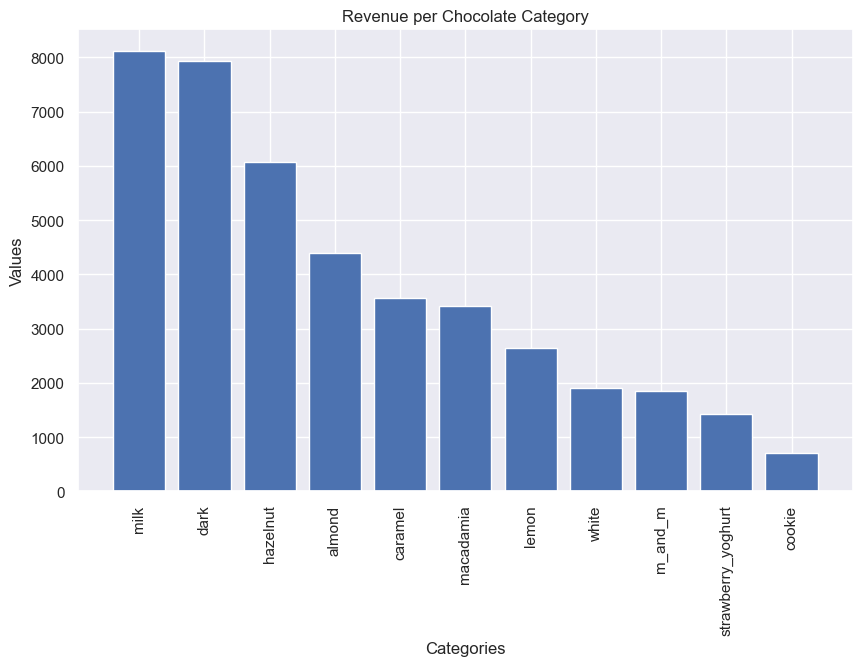

In [132]:


    # Custom the subplot layout with the size
    f = plt.figure(figsize=(10, 6))
     
    #number of bars in the bar chart
    x_bars = range(0,(len(df_categories.categories)))
     
    # Create bars and choose color
    plt.bar(x_bars, 
            df_categories.revenues)
     
    # Add title and axis names
    plt.title('Revenue per Chocolate Category')
    plt.xlabel('Categories')
    plt.ylabel('Values')
     
    # Create names on the x axis
    plt.xticks(x_bars, 
               df_categories.categories, 
               rotation=90)
     
    # Show graph
    plt.show()

The upside of using a bar chart is how easy it is to see the ranking of the different variables and the differences in magnitude. The downside is that you cannot easily visualize the weight of variables together. Other visualization options include lollipop and Spider charts.

## Find out which chocolates were purchased together

#Calculate the correlation scores among the chocolate types. Visualize using a heatmap and interpret the correlation values. Customize the heatmap for better visualization with at least 2 arguments

In [133]:
#Isolate the variables that you want to include in the correlation.

#isolate the chocolate variables, which are from columns 7 to 17
df_correlation = df.iloc[:,7:18]
df_correlation.head(1)

,hazelnut,milk,white,strawberry_yoghurt,caramel,dark,m_and_m,cookie,almond,macadamia,lemon
0,0.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [134]:
#Compute the correlation among the values.

#The corr() function computes a simple correlation matrix
df_correlation.corr()

,hazelnut,milk,white,strawberry_yoghurt,caramel,dark,m_and_m,cookie,almond,macadamia,lemon
hazelnut,1.000000,0.146393,0.019668,0.040335,-0.030118,-0.081992,-0.028548,-0.022700,-0.028117,0.015211,-0.018400
milk,0.146393,1.000000,-0.028886,-0.032250,-0.055045,-0.075345,-0.034080,-0.022668,-0.052755,-0.021098,-0.032308
white,0.019668,-0.028886,1.000000,-0.012810,-0.026288,-0.045843,-0.015328,-0.014971,-0.026751,-0.007834,-0.014670
strawberry_yoghurt,0.040335,-0.032250,-0.012810,1.000000,-0.015126,-0.038794,-0.017410,0.028919,-0.020417,-0.010621,-0.012317
caramel,-0.030118,-0.055045,-0.026288,-0.015126,1.000000,0.077490,0.184992,0.057520,0.049874,0.020524,-0.022462
dark,-0.081992,-0.075345,-0.045843,-0.038794,0.077490,1.000000,-0.028815,-0.012567,-0.034248,-0.036233,-0.050072
m_and_m,-0.028548,-0.034080,-0.015328,-0.017410,0.184992,-0.028815,1.000000,0.033778,-0.022277,-0.013478,-0.021476
cookie,-0.022700,-0.022668,-0.014971,0.028919,0.057520,-0.012567,0.033778,1.000000,-0.002333,-0.012019,-0.014726
almond,-0.028117,-0.052755,-0.026751,-0.020417,0.049874,-0.034248,-0.022277,-0.002333,1.000000,-0.013428,-0.012883
macadamia,0.015211,-0.021098,-0.007834,-0.010621,0.020524,-0.036233,-0.013478,-0.012019,-0.013428,1.000000,-0.003132


<Axes: >

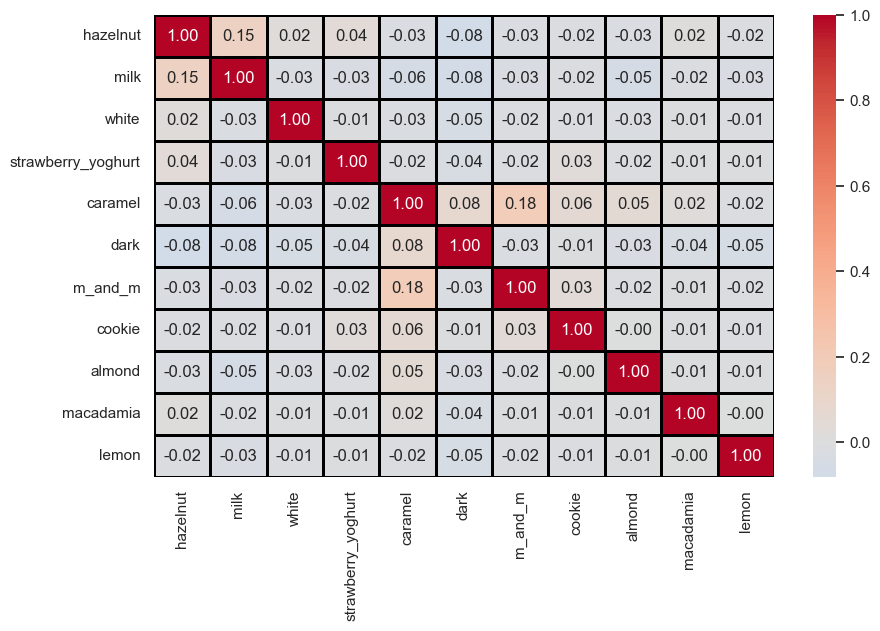

In [135]:
#Create a heatmap to visualize the correlation scores. The customizations included below help the graph shine.

#set size of the graph
fig, ax = plt.subplots(figsize=(10,6)) 

#Correlation heatmap
sns.heatmap(data = df_correlation.corr(),
#annot will include the correlation values in the chart
annot = True,
#to specify the decimal cases format
fmt = '.2f',
#to include a middle point in the color map
center = 0,
#Specify which color gradient map to include
cmap = 'coolwarm',
#Specify the width of the lines between the heatmap rectangules
linewidths = 1,
#Specify the color of the lines between rectangules
linecolor = 'black',
#include the figsize specified initially
ax = ax)


There are no high correlations among the chocolate types. The strongest relationships are between caramel and M&M's and between milk and hazelnut.

## Compare Stattistically the Profit and Revenue of men vs women

Compare the revenue per man and woman. Then, statistically compare whether the means are different. Create an if-else condition to automatically read the test results. Repeat the process for profit

In [152]:
#Import a library to perform a statistical test. Since both profit and revenue are continuous variables, you use a t-test that compares whether the means of both groups are statistically similar or not.
import scipy.stats as st

#Create objects for men and women with their revenues per customer.

#get the revenue for males and females
revenue_per_male = df[df['gender'] == 'Male'].revenue
revenue_per_female = df[df['gender'] == 'Female'].revenue


#Print the means per gender and compare.

#See average revenue per gender
print(round(revenue_per_male.fillna(0).mean(),1))
print(round(revenue_per_female.fillna(0).mean(),1))

nan
nan


Use a t-test with the ttest_ind function from the SciPy library. It compares the means of two groups. Build the if-else condition to read the t-test results.

In [137]:
#Use the ttest_ind to calculate the t-test.
#the function has two outputs - t-statistic and p-value -, that you can store.
stat, p = st.ttest_ind(a = revenue_per_male, b = revenue_per_female)
    
#print p-value
print(p)
    
#If condition to read t-test results
if p > 0.05:
    print('Both gender have similar revenue per customer (fail to reject H0)')
else:
    print('There is a difference in revenues per customer (reject H0)')

nan
There is a difference in revenues per customer (reject H0)


/var/folders/gc/100pfd8j49z3b15kddwjy4kw0000gn/T/ipykernel_3595/1573162351.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = st.ttest_ind(a = revenue_per_male, b = revenue_per_female)


Conclude that both genders have similar revenue per user. 

In [138]:
#Repeat the process for profit starting with isolating the profit per person and gender.

#profit per gender
profit_per_male = df[df['gender'] == 'Male'].profit
profit_per_female = df[df['gender'] == 'Female'].profit
    
#profit per gender
print(round(profit_per_male.mean(),2))
print(round(profit_per_female.mean(),2))

nan
nan


In [139]:
#The profit per user appears to be similar. Then, perform the statistical test.

#T-test
stat, p = st.ttest_ind(a = profit_per_male, b = profit_per_female)
#print p-value
print(p)
    
#If condition to read t-test results
if p > 0.05:
    print('Both gender have similar profit per customer (fail to reject H0)')
else:
    print('There is a difference in profit per customer (reject H0)')

nan
There is a difference in profit per customer (reject H0)


/var/folders/gc/100pfd8j49z3b15kddwjy4kw0000gn/T/ipykernel_3595/1221902271.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = st.ttest_ind(a = profit_per_male, b = profit_per_female)


Conclude that both genders have an identical profit per user.

## Determine Chocolate Preferences per Gender

Present the revenue per chocolate type and gender (male vs female) using a stacked plot. For that, create a new dataframe that contains the revenues per gender / chocolate type called df_categories_gender. The chocolate type should be in the index. Customize at least the title and the x-axis. If it is not insightful, find a different way to present the data.

In [140]:
#First, create a dataframe with the total amount of revenues per chocolate type and gender.

# Retrieve variable names of each chocolate type
categories = df.iloc[:,7:18].columns
categories

Index(['hazelnut', 'milk', 'white', 'strawberry_yoghurt', 'caramel', 'dark',
       'm_and_m', 'cookie', 'almond', 'macadamia', 'lemon'],
      dtype='object')

In [141]:
# Subset the dataframe between males and females.

#create a dataframe for each gender
df_male = df[df['gender'] == 'Male']
df_female = df[df['gender'] == 'Female']

In [142]:
#Compute the total revenues per chocolate type and per gender..

#Create an empty list for revenues per gender
revenues_male = []
revenues_female = []
    
#the chocolate types go from columns 7 to 17. We need to sum per gender
for i in range(7,18):
    #sum each column per gender 
    sum_male = df_male.iloc[:, i].sum()
    sum_female = df_female.iloc[:, i].sum()
    
    #append to the list created above
    revenues_male.append(sum_male)
    revenues_female.append(sum_female)
    
#print the outcome
print(revenues_male)
print(revenues_female)

[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]


In [143]:
#Create a new dataframe that combines the categories and total revenues per gender.

#creating a dataframe with the revenues per category
df_categories_gender = pd.DataFrame({'categories': categories,
                                'revenues_male': revenues_male,
                                'revenues_female': revenues_female})
    
#sorting the values in terms of magnitude helps the visualization
df_categories_gender = df_categories_gender.sort_values(by = "revenues_female",
                                                        ascending = False)
    
#Specifying the index with the categories will help the visualization
df_categories_gender = df_categories_gender.set_index('categories')
df_categories_gender

,revenues_male,revenues_female
categories,,
hazelnut,0.000000,0.000000
milk,0.000000,0.000000
white,0.000000,0.000000
strawberry_yoghurt,0.000000,0.000000
caramel,0.000000,0.000000
dark,0.000000,0.000000
m_and_m,0.000000,0.000000
cookie,0.000000,0.000000
almond,0.000000,0.000000


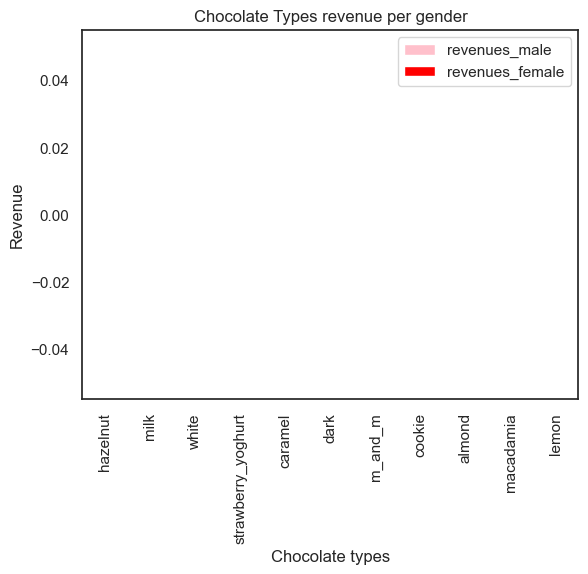

In [144]:
#Then, use a stacked plot to see the distribution per gender of the chocolate types' revenues.
#
#set seaborn plotting aesthetics
sns.set(style='white')
    
#create stacked bar chart
df_categories_gender.plot(kind='bar', 
                            stacked=True, 
                            color=['pink', 'red'])
    
#add overall title
plt.title('Chocolate Types revenue per gender', fontsize=12)
    
#add axis titles
plt.xlabel('Chocolate types')
plt.ylabel('Revenue')
    
#rotate x-axis labels
plt.xticks(rotation=90)
    
plt.show()

In [145]:
#Look into other possibilities to analyze chocolate preferences per gender. One simple way is to look into the shares in each chocolate type.

#compute the male share in each chocolate type
df_categories_gender['male_pct'] = df_categories_gender.revenues_male / (df_categories_gender.revenues_male + df_categories_gender.revenues_female)

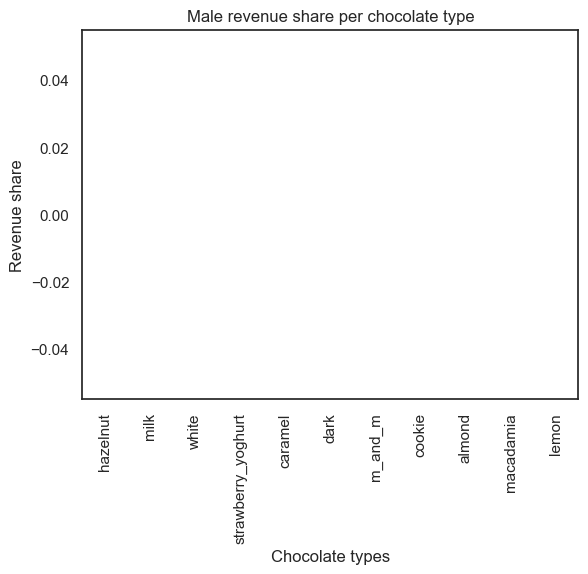

In [146]:
#One possibility is to compute the shares and plot them. An example of the chart is below using a bar chart.

#create stacked bar chart
df_categories_gender['male_pct'].plot(kind='bar')
    
#add overall title
plt.title('Male revenue share per chocolate type', fontsize=12)
    
#add axis titles
plt.xlabel('Chocolate types')
plt.ylabel('Revenue share')
    
#rotate x-axis labels
plt.xticks(rotation=90)
    
plt.show()

Conclusion: men have a relatively higher preference for Caramel and White Chocolate versus a relatively lower preference for Lemon and Strawberry Yoghurt.

## Assess if the penetration per age group is different per gender

Create a new variable, age_group, that bins age into 5 groups. With a chi-square, test the relationship between age groups and gender. Build an if-else condition to read the test results.

In [147]:
#Build the age groups using the cut function from Pandas. One possible way to group age is the following bins but there are other possibilities.

#create age groups
bins = [14, 30, 40, 50, 60, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
df['age_group'] = pd.cut(df.age, 
                            bins, 
                            labels = labels, 
                            include_lowest = True)
df.head()

,customer_id,firstorder,gender,age,orders,discount_rate,revenue,hazelnut,milk,white,...,caramel,dark,m_and_m,cookie,almond,macadamia,lemon,average_item_value,profit,age_group
0,9640000000000.000000,202205.000000,NaN,37.000000,1,0.250000,7.500000,0.000000,7.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.800000,0.800000,30-39
1,8750000000000.000000,202205.000000,NaN,54.000000,1,0.250000,9.800000,0.000000,0.000000,0.000000,...,0.000000,9.800000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000,1.200000,50-59
5,6600000000000.000000,202209.000000,NaN,37.000000,1,0.250000,6.400000,2.400000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,0.500000,30-39
6,6650000000000.000000,202205.000000,NaN,37.000000,1,0.250000,8.200000,0.000000,0.000000,0.000000,...,0.000000,8.200000,0.000000,0.000000,0.000000,0.000000,0.000000,4.100000,0.500000,30-39
7,6630000000000.000000,202208.000000,NaN,39.000000,2,0.000000,17.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,9.200000,4.300000,3.100000,30-39


In [148]:
# Chi-Square Test: Used to test the association between categorical variables.
#Next, create a cross-tabulation with the age groups and gender. There is a blank group for gender, which can be ignored for simplicity if you wish.

#cross tabulation
tab = pd.crosstab(index = df.gender,
                    columns = df.age_group)
tab

age_group
gender


In [149]:
#Run the chi-square test to study the relationship between the categorical variables. Additionally, build an if-else condition to read the test results.

#chi-square test
chi2, p, dof, exp = st.chi2_contingency(tab)
print(p)
    
#if else condition to interpret the results of the chi-square test
if p > 0.05:
    print("there is no relationship (fail to reject H0)")
else:
    print('There is a strong relationship (reject H0)')

ValueError: No data; `observed` has size 0.

## Probability Distributions


In [ ]:
#Normal Distribution: A symmetric, bell-shaped distribution characterized by its mean and standard deviation.

In [ ]:
#Binomial Distribution: A distribution representing the number of successes in a fixed number of binary (success/failure) trials.

In [ ]:
#Poisson Distribution: A distribution representing the number of events occurring within a fixed interval of time or space.

## Correlation and Association


In [ ]:
#Pearson Correlation Coefficient: A measure of the linear relationship between two continuous variables, ranging from -1 to 1.

In [ ]:
# Correlation: Spearman's Rank Correlation Coefficient: A measure of the monotonic relationship between two variables, useful for ordinal data.

In [ ]:
# Chi-Square Test: Used to test the association between categorical variables.


## Advanced Topics


In [ ]:
# Multivariate Analysis

In [ ]:
# Time Series Analysis